In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os


In [8]:
# Configure logging
log_file = "E:\\hyperspectral_don_prediction\\notebooks\\pipeline.log"
os.makedirs(os.path.dirname(log_file), exist_ok=True)
logging.basicConfig(filename=log_file, level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

In [9]:
# Load data function
def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        logging.info(f"Data loaded: {filepath}, Shape: {df.shape}")
        return df
    except Exception as e:
        logging.error(f"Error loading {filepath}: {e}")
        return None

# Load dataset
data_path = "E:\\hyperspectral_don_prediction\\data\\MLE-Assignment.csv"
df = load_data(data_path)

# Print result
print(df.head() if df is not None else "Failed to load data.")


           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443       444       445 

In [10]:
# Display basic info
logging.info("Dataset Information:")
logging.info(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
logging.info("\nMissing values per column:")
logging.info(missing_values[missing_values > 0])

In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


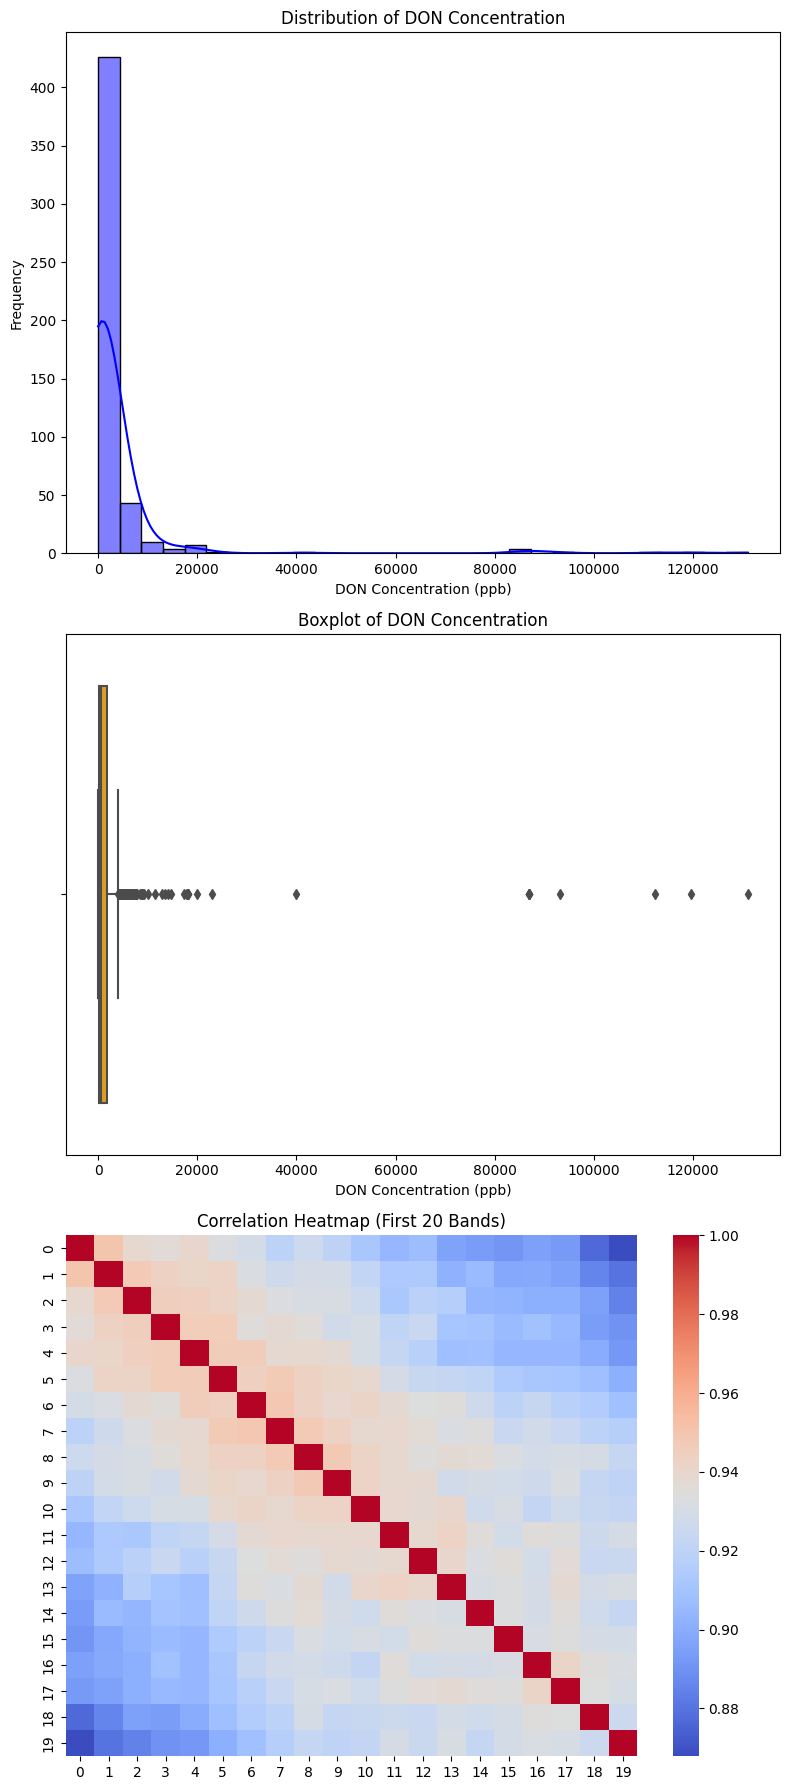

Image saved at: E:/hyperspectral_don_prediction/images\combined_visuals.png


In [14]:


# Define save directory
save_dir = "E:/hyperspectral_don_prediction/images"
os.makedirs(save_dir, exist_ok=True)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Histogram (Distribution of DON Concentration)
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution of DON Concentration")
axes[0].set_xlabel("DON Concentration (ppb)")
axes[0].set_ylabel("Frequency")

# Boxplot (Identifying Outliers)
sns.boxplot(x=df['vomitoxin_ppb'], color='orange', ax=axes[1])
axes[1].set_title("Boxplot of DON Concentration")
axes[1].set_xlabel("DON Concentration (ppb)")

# Heatmap (Correlation of First 20 Wavelength Bands)
sns.heatmap(df.iloc[:, 1:21].corr(), cmap='coolwarm', ax=axes[2])
axes[2].set_title("Correlation Heatmap (First 20 Bands)")

# Save and show
save_path = os.path.join(save_dir, "combined_visuals.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"Image saved at: {save_path}")
